<a href="https://colab.research.google.com/github/visheshagrawal/IR2022_A3_96/blob/main/IR_A3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/drive/MyDrive/IR/HW3/Wiki-Vote.txt"
wiki_db = open(file_path)
node_set=set()
edge_set=[]

Describe Dataset

In [ ]:
c = 0
for line in wiki_db:
  c+=1
  if (c>4):
    lines = []
    ls1 = int(line.split()[0])
    ls2 = int(line.split()[1])
    node_set.add(ls1)
    node_set.add(ls2)
    lines.append(ls1)
    lines.append(ls2)
    edge_set.append(lines)

print("Number of nodes : ",len(node_set))
print("Number of edges : ",len(edge_set))

Number of nodes :  7115
Number of edges :  103689


In [ ]:
graph = {}

inDegreee={x:0 for x in node_set}
outDegree={x:0 for x in node_set}

def gridToAdjacencyList(edges):
    # initializing the graph (converting edges into an adjacency list)
    for i in node_set:
        graph[i] = list()

    for edge in edges:
        graph[edge[0]].append(edge[1]) 

gridToAdjacencyList(edge_set)

In [ ]:
inDegreee={x:0 for x in node_set}
inDegreee

In [ ]:
for i in graph:
  ls = graph[i]
  outDegree[i] = len(ls)
  for j in ls:
    inDegree[j]+=1

outDegree[30]

5

In [ ]:
#Find Average In-Degree, Out-Degree 
avgInDegree = 0
avgOutDegree = 0

for i in inDegree:
  avgInDegree += inDegree[i]

for i in outDegree:
  avgOutDegree += outDegree[i]

print("Average In-Degree : ",(avgInDegree/len(node_set)))
print("Average Out-Degree : ",(avgOutDegree/len(node_set)))

Average In-Degree :  14.573295853829936
Average Out-Degree :  14.573295853829936


In [ ]:
#Find Node with Maximum In-Degree and Node with Maximum Out-Degree

maxInDegree = 0
maxOutDegree = 0

maxInDegreeNode = 0
maxOutDegreeNode = 0

for i in inDegree:
  if maxInDegree < inDegree[i]:
    maxInDegree = inDegree[i]
    maxInDegreeNode = i

for i in outDegree:
  if maxOutDegree < outDegree[i]:
    maxOutDegree = outDegree[i]
    maxOutDegreeNode = i

print("Node with maximum ",maxInDegree," In-Degree : ","Node ",maxInDegreeNode)
print("Node with maximum ",maxOutDegree," Out-Degree : ","Node ",maxOutDegreeNode)

Node with maximum  457  In-Degree :  Node  4037
Node with maximum  893  Out-Degree :  Node  2565


In [ ]:
# Density of network = No. of Edges/(Total number of edges)
# = m/n*(n-1)

density = (len(edge_set)/(len(node_set)*(len(node_set)-1)))
print("Density of the network is : ",density)

Density of the network is :  0.0020485375110809584


Text(0, 0.5, 'Frequency')

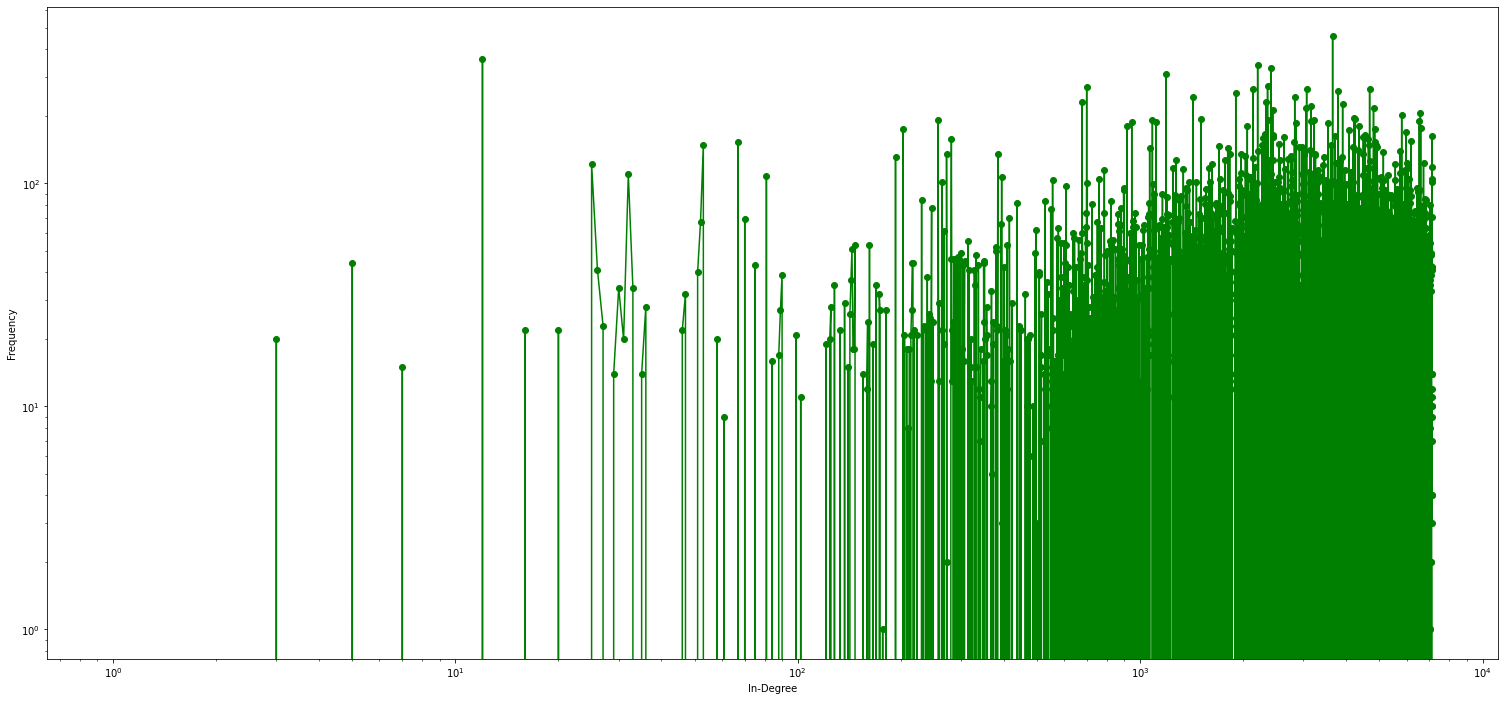

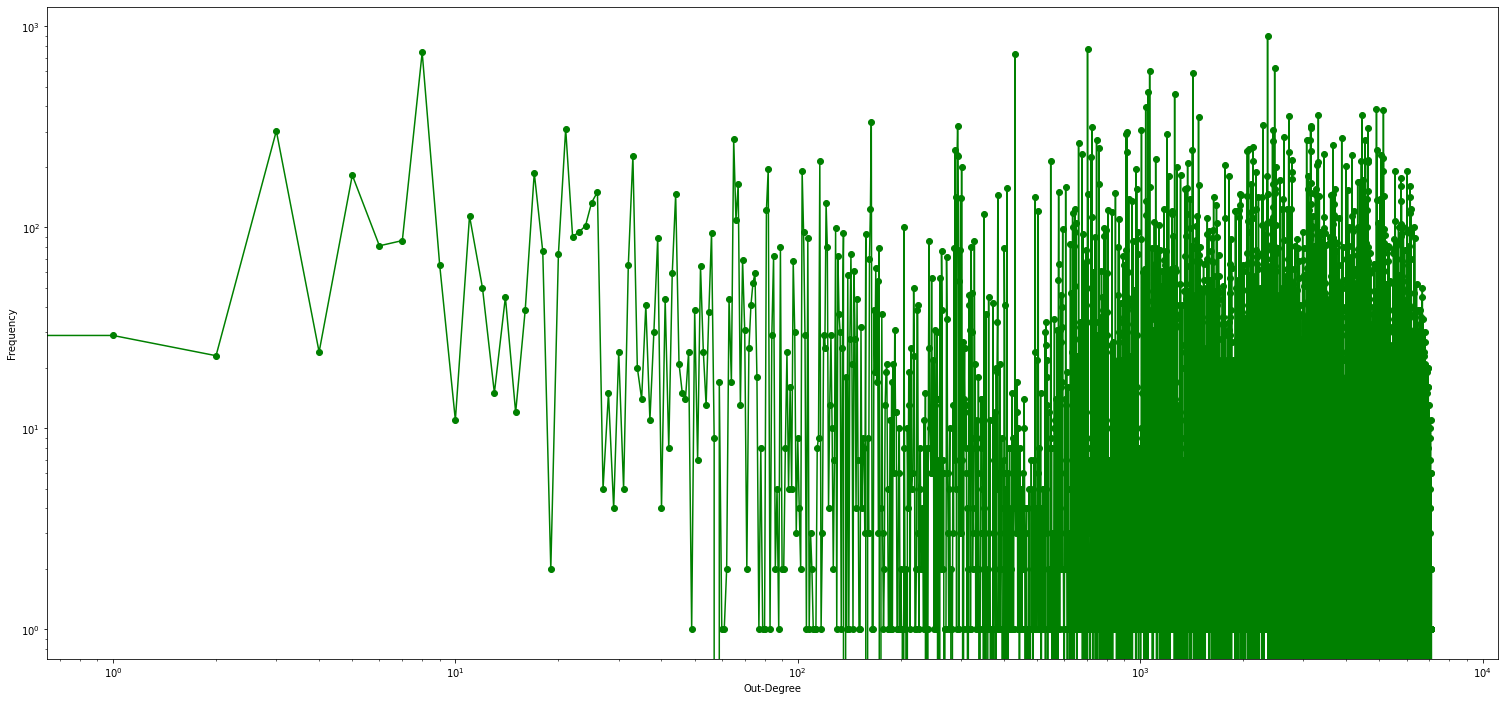

In [ ]:
# Plotting In-Degree and Out-Degree of network

import matplotlib.pyplot as plt

ind = []
outd = []

for i in inDegree:
  ind.append(inDegree[i])
  outd.append(outDegree[i])

in_degree_freq = ind
out_degree_freq = outd

plt.figure(figsize=(26, 12)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.xlabel('In-Degree')
plt.ylabel('Frequency')

plt.figure(figsize=(26, 12)) 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'go-', label='out-degree') 
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

Text(0, 0.5, 'Value')

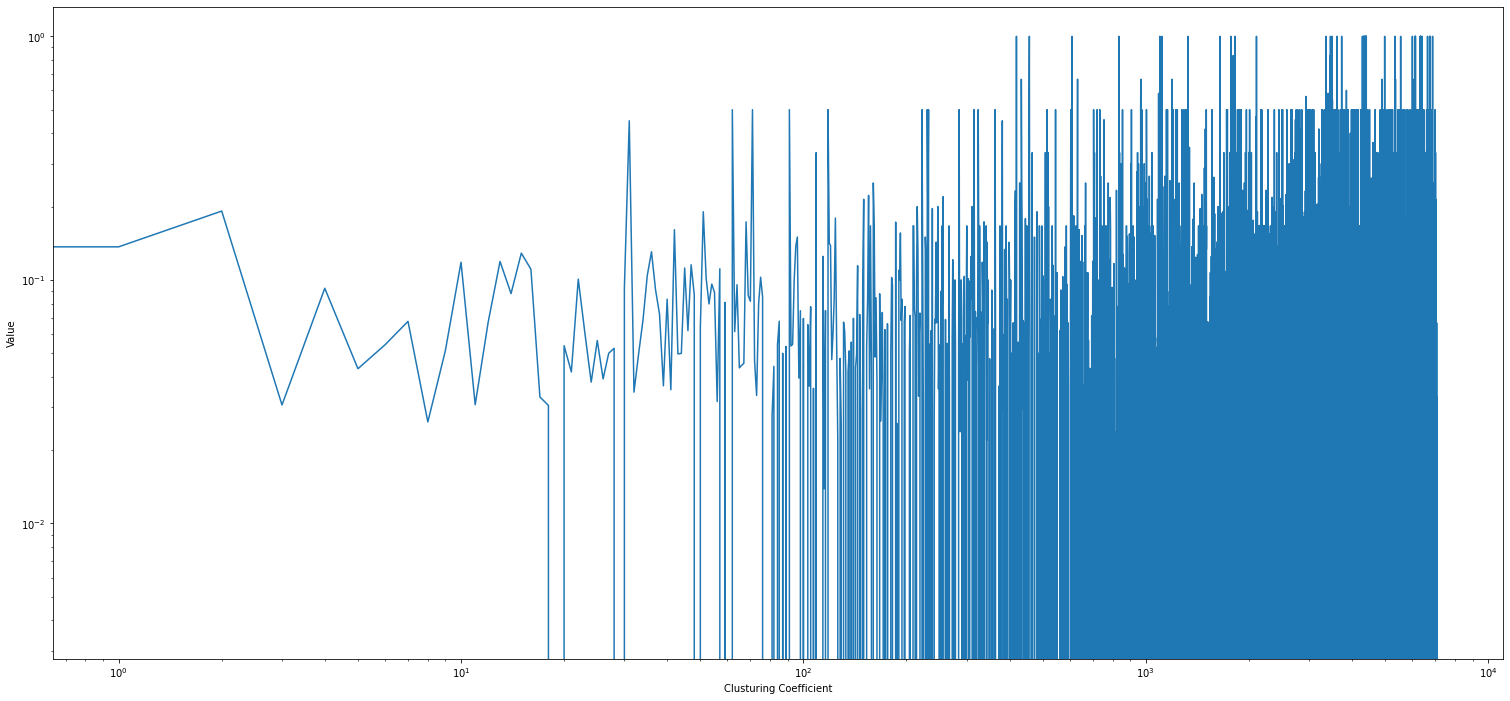

In [ ]:
clusturingCoeff = []

for i in graph:
  ls = graph[i]
  degree = len(ls)
  coeff = 0
  for j in ls:
    for k in ls:
      if j!=k and j in graph[k]:
        coeff+=1
  if degree == 0 or degree == 1:
    clusturingCoeff.append(0)
  else:
    clusturingCoeff.append((coeff)/(degree*(degree-1)))


plt.figure(figsize=(26, 12)) 
plt.loglog(range(len(clusturingCoeff)), clusturingCoeff, label='clusturing coefficient') 
plt.xlabel('Clusturing Coefficient')
plt.ylabel('Value')

In [ ]:
# degree centrality measure = No of neighbours connected / (# of nodes -1)


degreeCentrality = {}
n = len(graph)-1

#print(graph)

for i in graph:
  count = 0
  neighbours = graph[i]
  for j in neighbours:
    for k in neighbours:
      if j!=k and k in graph[j]:
        count += 1

  dc = count/n
  degreeCentrality[i] = dc

print(degreeCentrality)

file = open("dCenterality.txt","w")
for i in degreeCentrality:
  file.write("%d : %f\n" %(i,degreeCentrality[i]))
file.close()

{3: 0.005341579983131853, 4: 0.015603036266516728, 5: 0.013635085746415518, 6: 0.3917627213944335, 7: 0.007168962608940118, 8: 0.20002811357885858, 9: 0.049339330896823165, 10: 0.06944053978071409, 11: 2.024318245712679, 12: 0.029940961484396962, 13: 0.0018273826258082655, 14: 0.05566488614000562, 15: 0.023053134664042733, 16: 0.003514197357323587, 17: 0.024458813606972166, 18: 0.002389654202980039, 19: 0.023053134664042733, 20: 0.161653078436885, 21: 0.024458813606972166, 22: 0.0, 23: 0.040764689344953614, 24: 0.5605847624402587, 25: 0.11343829069440539, 26: 0.07604723081248244, 27: 0.05510261456283385, 28: 0.13916221535001405, 29: 0.12327804329491145, 30: 0.0001405678942929435, 31: 0.0015462468372223785, 32: 0.0, 33: 0.007168962608940118, 34: 0.0012651110486364915, 35: 0.020241776778183864, 36: 0.3567613157154906, 37: 0.003654765251616531, 38: 0.0026707899915659264, 39: 0.03008152937868991, 40: 0.0014056789429294349, 41: 0.00885577734045544, 42: 0.04048355355636773, 43: 0.00014056789